In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, NelsonAalenFitter

In [3]:
from thesis_tools.utils.data import *
from thesis_tools.models.frequentist import *
from thesis_tools.statistics.hazard import *

In [4]:
df = read_panel_data()

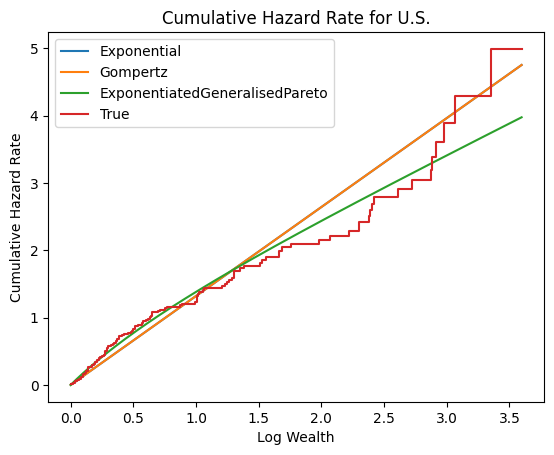

In [5]:
country = 'U.S.'
country_obs = []
for obs in df[(df['year'] == 2022) & (df['group'] == country)]['net_worth']:
    country_obs.extend(obs)
country_obs = np.array(country_obs)
country_log_obs = np.log(country_obs)
# take only the top 10 percent of observations
top_share = 0.2
country_log_obs = country_log_obs[country_log_obs.argsort()[::-1][:int(len(country_log_obs) * top_share)]]
min_country_log_obs = np.min(country_log_obs)
country_log_obs = country_log_obs - min_country_log_obs
analysis = HazardRateAnalysis(country_log_obs, country=country)
analysis.plot_cumulative_hazard()

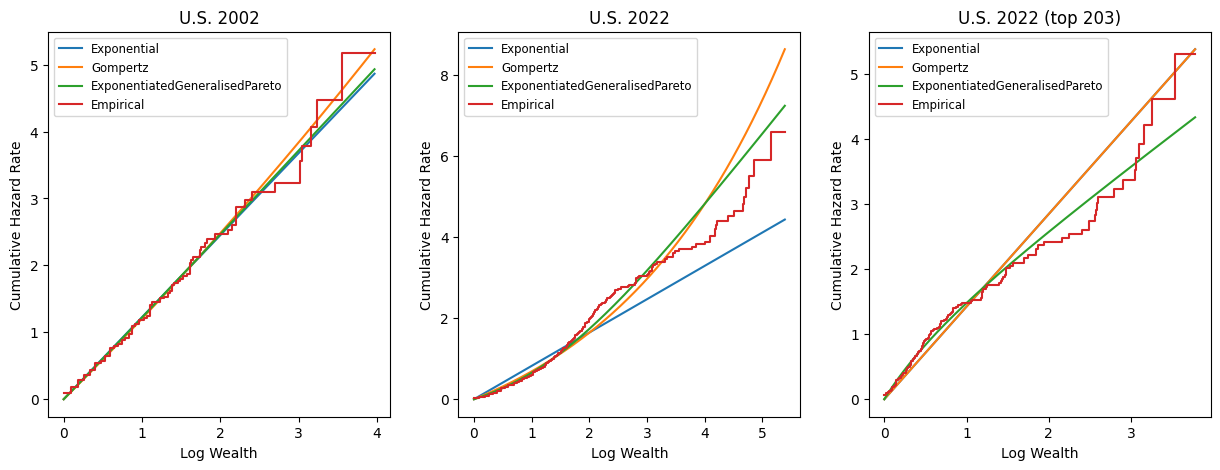

In [13]:
# comparison between the US in 3 times
country = 'U.S.'
# 2002 full sample
obs_1 = []
for obs in df[(df['year'] == 2002) & (df['group'] == country)]['net_worth']:
    obs_1.extend(obs)
obs_1 = np.array(obs_1)
obs_1 = np.log(obs_1)
n_obs_1 = len(obs_1)
# 2022 full sample
obs_2 = []
for obs in df[(df['year'] == 2022) & (df['group'] == country)]['net_worth']:
    obs_2.extend(obs)
obs_2 = np.array(obs_2)
obs_2 = np.log(obs_2)
n_obs_2 = len(obs_2)
# 2022 subset
obs_3 = []
for obs in df[(df['year'] == 2022) & (df['group'] == country)]['net_worth']:
    obs_3.extend(obs)
obs_3 = np.array(obs_3)
obs_3 = np.log(obs_3)
obs_3 = obs_3[obs_3.argsort()[::-1][:int(n_obs_1*333.3/287.6)]]
min_obs_3 = np.min(obs_3)
obs_3 = obs_3 - min_obs_3
n_obs_3 = len(obs_3)
analysis_1 = HazardRateAnalysis(obs_1, country=country)
analysis_2 = HazardRateAnalysis(obs_2, country=country)
analysis_3 = HazardRateAnalysis(obs_3, country=country)
# make 3 plots next to each other
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
analysis_1.plot_cumulative_hazard(ax=ax[0], title='U.S. 2002')
analysis_2.plot_cumulative_hazard(ax=ax[1], title='U.S. 2022')
analysis_3.plot_cumulative_hazard(ax=ax[2], title='U.S. 2022 (top 203)')

In [14]:
n_obs_1, n_obs_2, n_obs_3

(176, 735, 203)

### Plots for all countries

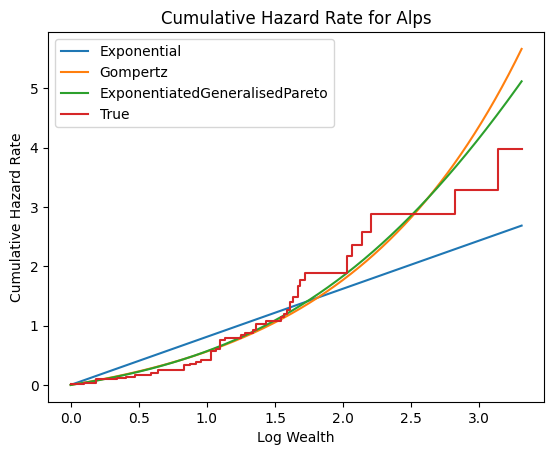

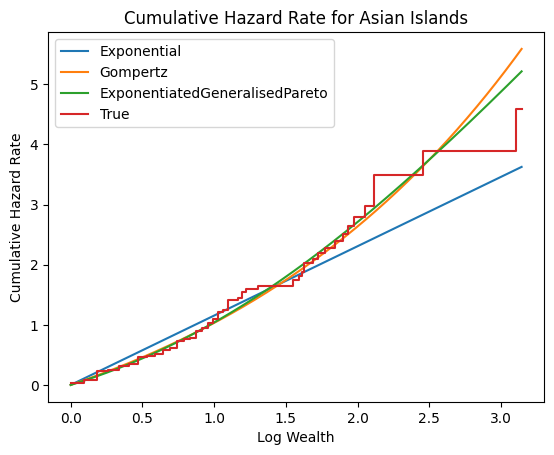

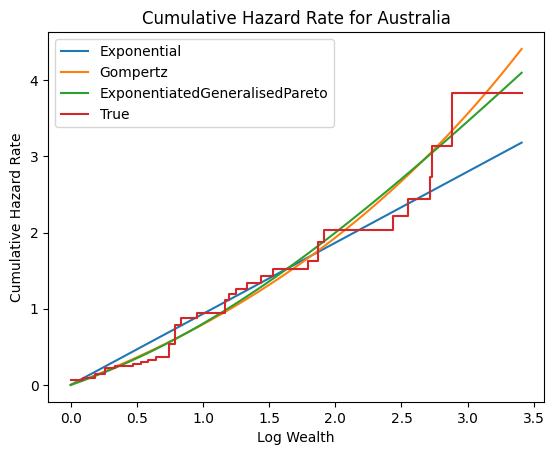

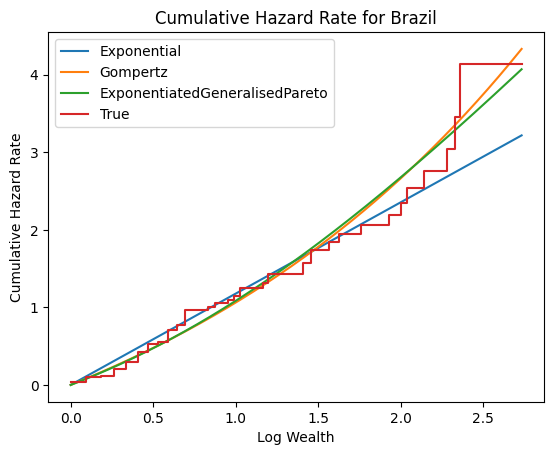

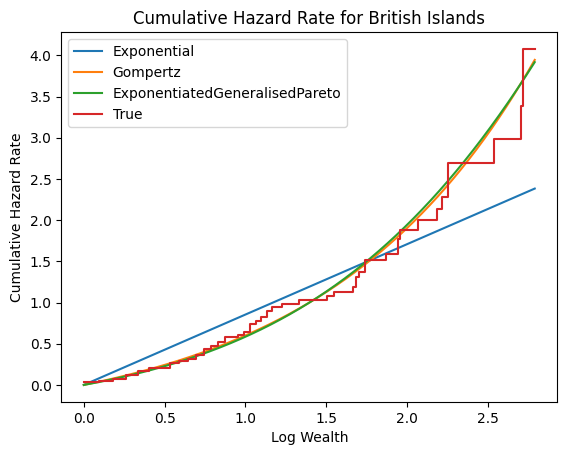

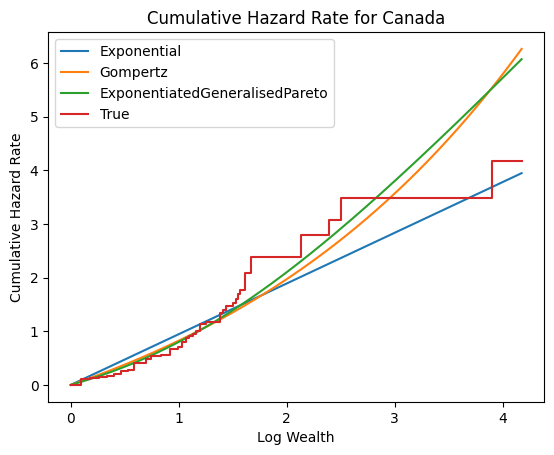

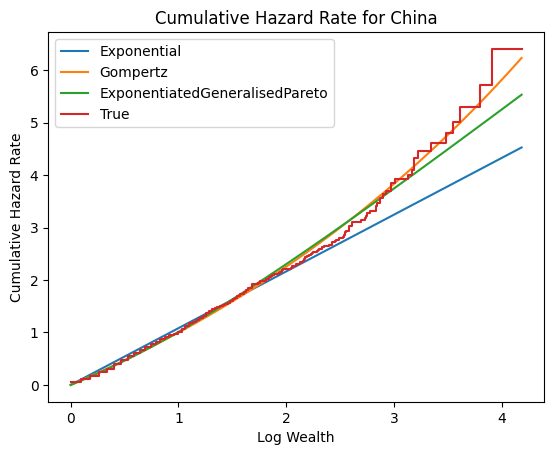

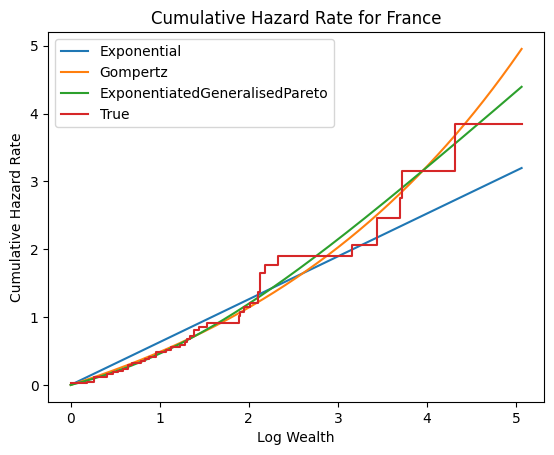

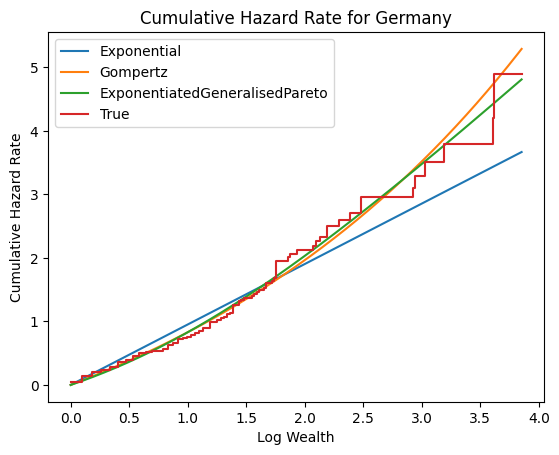

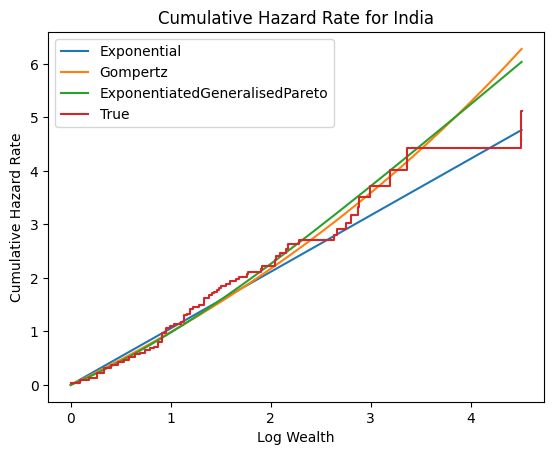

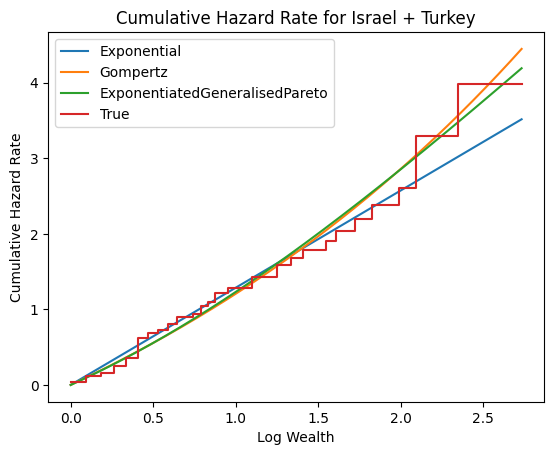

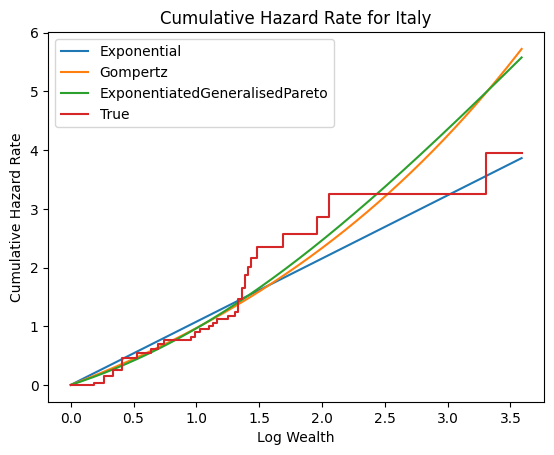

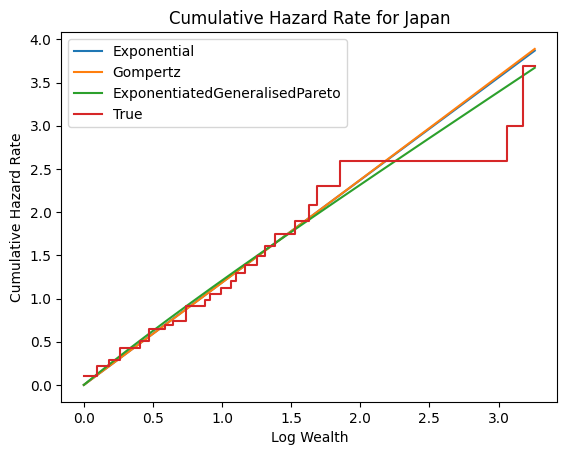

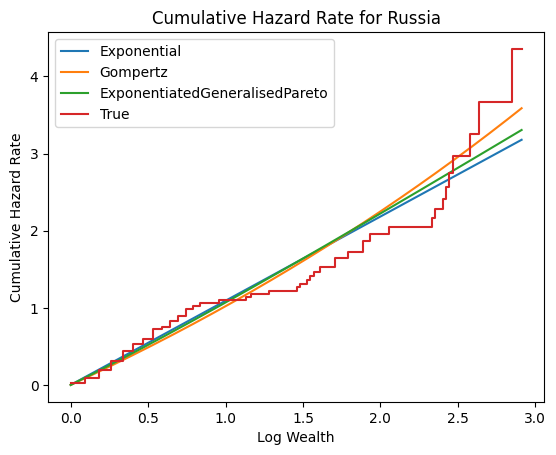

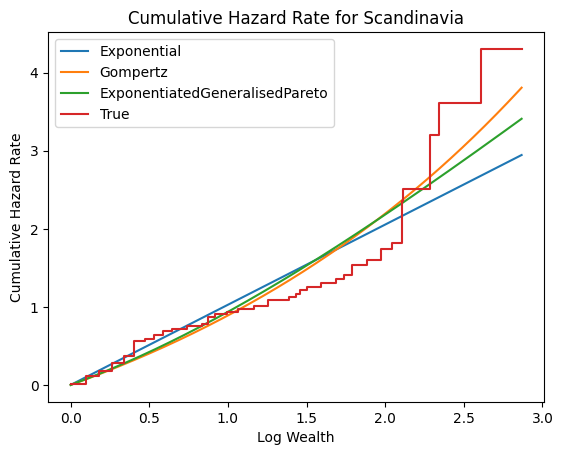

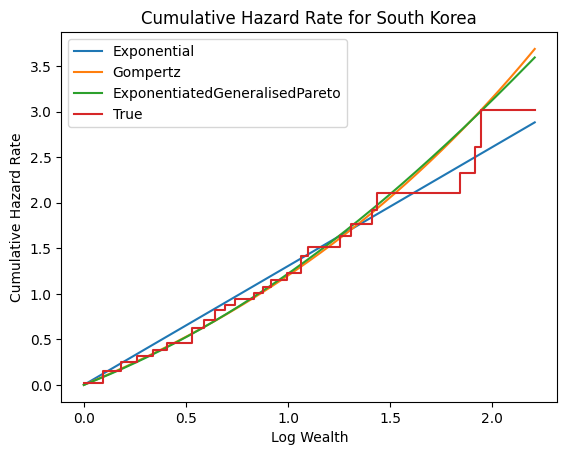

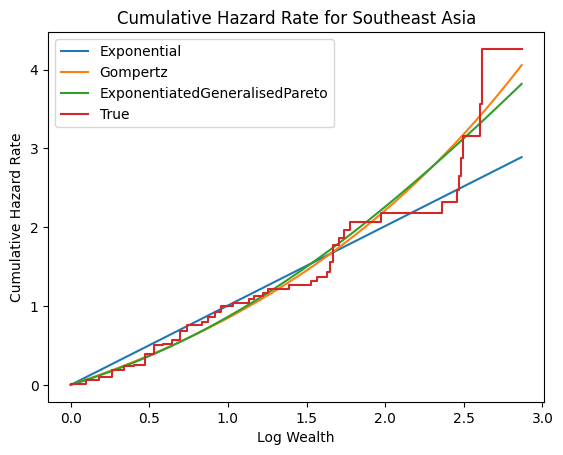

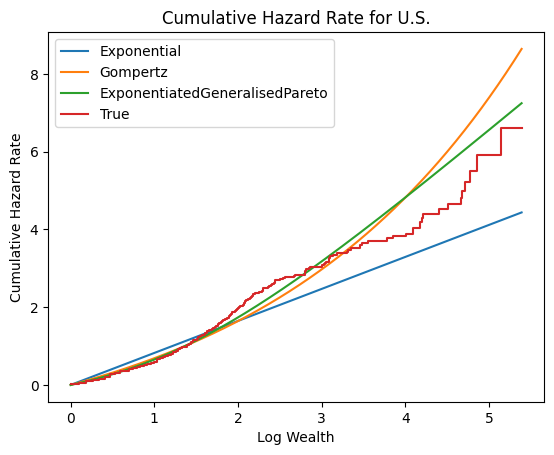

In [ ]:
countries = df['group'].unique()
for country in countries:
    country_obs = []
    for obs in df[(df['year'] == 2022) & (df['group'] == country)]['net_worth']:
        country_obs.extend(obs)
    country_obs = np.array(country_obs)
    country_log_obs = np.log(country_obs)
    analysis = HazardRateAnalysis(country_log_obs, country=country)
    analysis.plot_cumulative_hazard()

### Remove outliers for France

In [ ]:
france_2022 = np.array(df[(df['year'] == 2022) & (df['group'] == 'France')]['net_worth'].values[0])
# remove the top observation
france_2022 = france_2022[france_2022 < np.max(france_2022)]
france_2022 = france_2022[france_2022 < np.max(france_2022)]

In [ ]:
france_2022

array([41.4, 40.4, 31.2, 31.2, 23.5, 10.3,  8.9,  8.4,  8.4,  8.4,  8.2,
        8.2,  7.5,  7. ,  6.7,  6.6,  6.6,  4.6,  4.2,  4. ,  4. ,  3.8,
        3.7,  3.6,  3.4,  3.1,  2.9,  2.6,  2.6,  2.4,  2.3,  2.2,  2. ,
        1.9,  1.9,  1.8,  1.7,  1.6,  1.5,  1.5,  1.3,  1.3,  1.3,  1.2,
        1. ])

In [ ]:
GeneralisedPareto(france_2022).fit(france_2022)

(0.5708897511954918, 3.140433197644662, 1.0)

In [ ]:
usa_2022 = np.array(df[(df['year'] == 2022) & (df['group'] == 'U.S.')]['net_worth'].values[0])
# usa_2022 = usa_2022[usa_2022 < np.max(usa_2022)]
# usa_2022 = usa_2022[usa_2022 < np.max(usa_2022)]

In [ ]:
GeneralisedPareto().fit(usa_2022)

(0.5572802154276775, 2.1811250885844595, 1.0)